<a href="https://colab.research.google.com/github/cnagineni23/My-First-Project/blob/main/Bread_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing Bread Basket Analysis

In [1]:
#Loading neccesary packages

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#importing the dataset and creating a dataframe

df=pd.read_csv('/content/bread basket.csv')

In [3]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


###Data Preparation

In [4]:
df['date_time']=pd.to_datetime(df['date_time'])

In [5]:
 #seperating date from the date_time column
 
df['date']=df['date_time'].dt.date

In [6]:
#seperating month from the date_time column for better understanding

df['month']=df['date_time'].dt.month

df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [7]:
df['time']=df['date_time'].dt.time

In [8]:
df.drop('date_time', axis = 1, inplace=True)

In [9]:
df.shape

(20507, 8)

In [10]:
df['period_day'].value_counts()

afternoon    11569
morning       8404
evening        520
night           14
Name: period_day, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   period_day       20507 non-null  object
 3   weekday_weekend  20507 non-null  object
 4   date             20507 non-null  object
 5   month            20507 non-null  object
 6   weekday          20507 non-null  object
 7   time             20507 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
#data cleaning

df['Item'] = df['Item'].str.strip()
df.dropna(axis=0, subset=['Transaction'], inplace=True)
df['Transaction'] = df['Transaction'].astype('str')
df.head()

,Transaction,Item,period_day,weekday_weekend,date,month,weekday,time
0,1,Bread,morning,weekend,2016-10-30,October,Sunday,09:58:00
1,2,Scandinavian,morning,weekend,2016-10-30,October,Sunday,10:05:00
2,2,Scandinavian,morning,weekend,2016-10-30,October,Sunday,10:05:00
3,3,Hot chocolate,morning,weekend,2016-10-30,October,Sunday,10:07:00
4,3,Jam,morning,weekend,2016-10-30,October,Sunday,10:07:00


In [13]:
df['Item'].value_counts()

Coffee          5471
Bread           3325
Tea             1435
Cake            1025
Pastry           856
                ... 
Raw bars           1
Bacon              1
Chicken sand       1
The BART           1
Adjustment         1
Name: Item, Length: 94, dtype: int64

In [14]:
#viewing max transactions

df['Transaction'].max() 

'999'

###Training Model

In [15]:
def encoder(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

apriori_data = df.groupby(['Transaction','Item'])['Item'].count().reset_index(name ='Count')
apriori_basket = apriori_data.pivot_table(index = 'Transaction', columns = 'Item', values = 'Count', aggfunc = 'sum').fillna(0)
apriori_basket_set = apriori_basket.applymap(encoder)
apriori_basket_set.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
#Generating frequent items

freq_itemsets = apriori(apriori_basket_set, min_support=0.05, use_colnames=True)

In [17]:
#viewing freq_items

freq_itemsets

,support,itemsets
0,0.327205,(Bread)
1,0.103856,(Cake)
2,0.478394,(Coffee)
3,0.054411,(Cookies)
4,0.058320,(Hot chocolate)
5,0.061807,(Medialuna)
6,0.086107,(Pastry)
7,0.071844,(Sandwich)
8,0.142631,(Tea)
9,0.090016,"(Bread, Coffee)"


In [18]:
#generating rules

my_rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.05)
my_rules.sort_values('confidence', ascending = False, inplace = True)

In [19]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
0,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561
1,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905


###Making Recommendations

In [20]:
apriori_basket['Coffee'].sum()

5471.0

In [21]:
apriori_basket['Eggs'].sum()

28.0

In [22]:
#filtering rules

my_rules[ (my_rules['lift'] >= 1) &
       (my_rules['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664


###Data Visualization

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

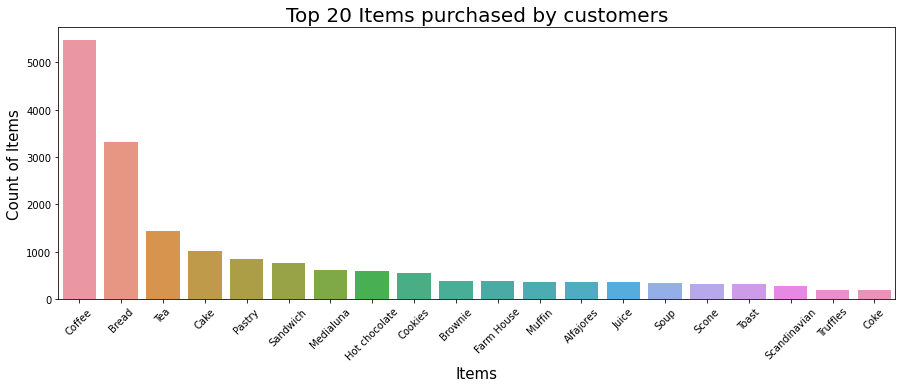

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values)
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers',size = 20)
plt.show()

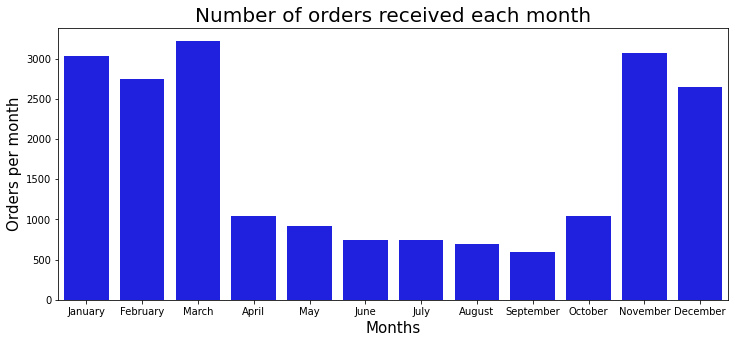

In [25]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction",color='blue')
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month',size = 20)
plt.show()

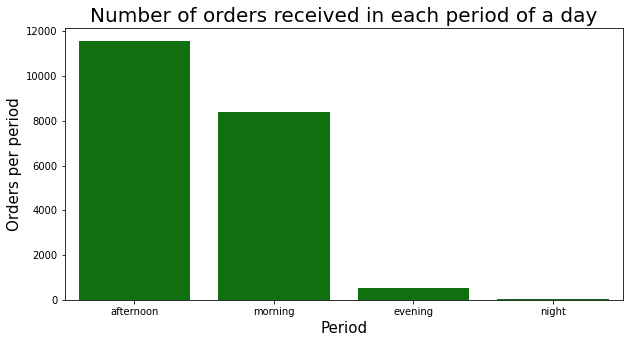

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.period_day.value_counts().index, y = df.period_day.value_counts().values, color='green')
plt.xlabel('Period', size = 15)
plt.ylabel('Orders per period', size = 15)
plt.title('Number of orders received in each period of a day', size = 20)
plt.show()

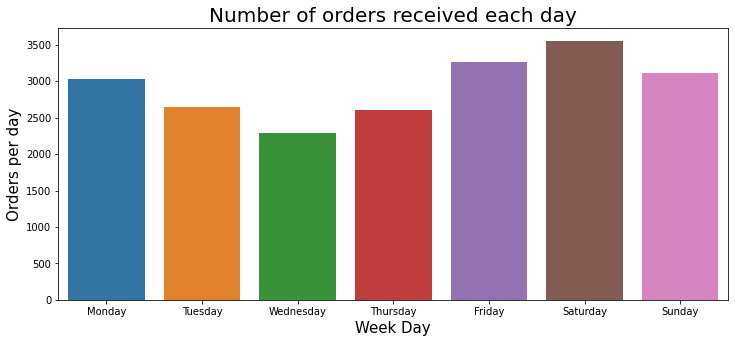

In [27]:
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day',size = 20)
plt.show()

plt.show()